<a href="https://colab.research.google.com/github/mortymh/moryton/blob/master/Regression%20with%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
🔹 Showing first 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

🔹 Dataframe info:
<class

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


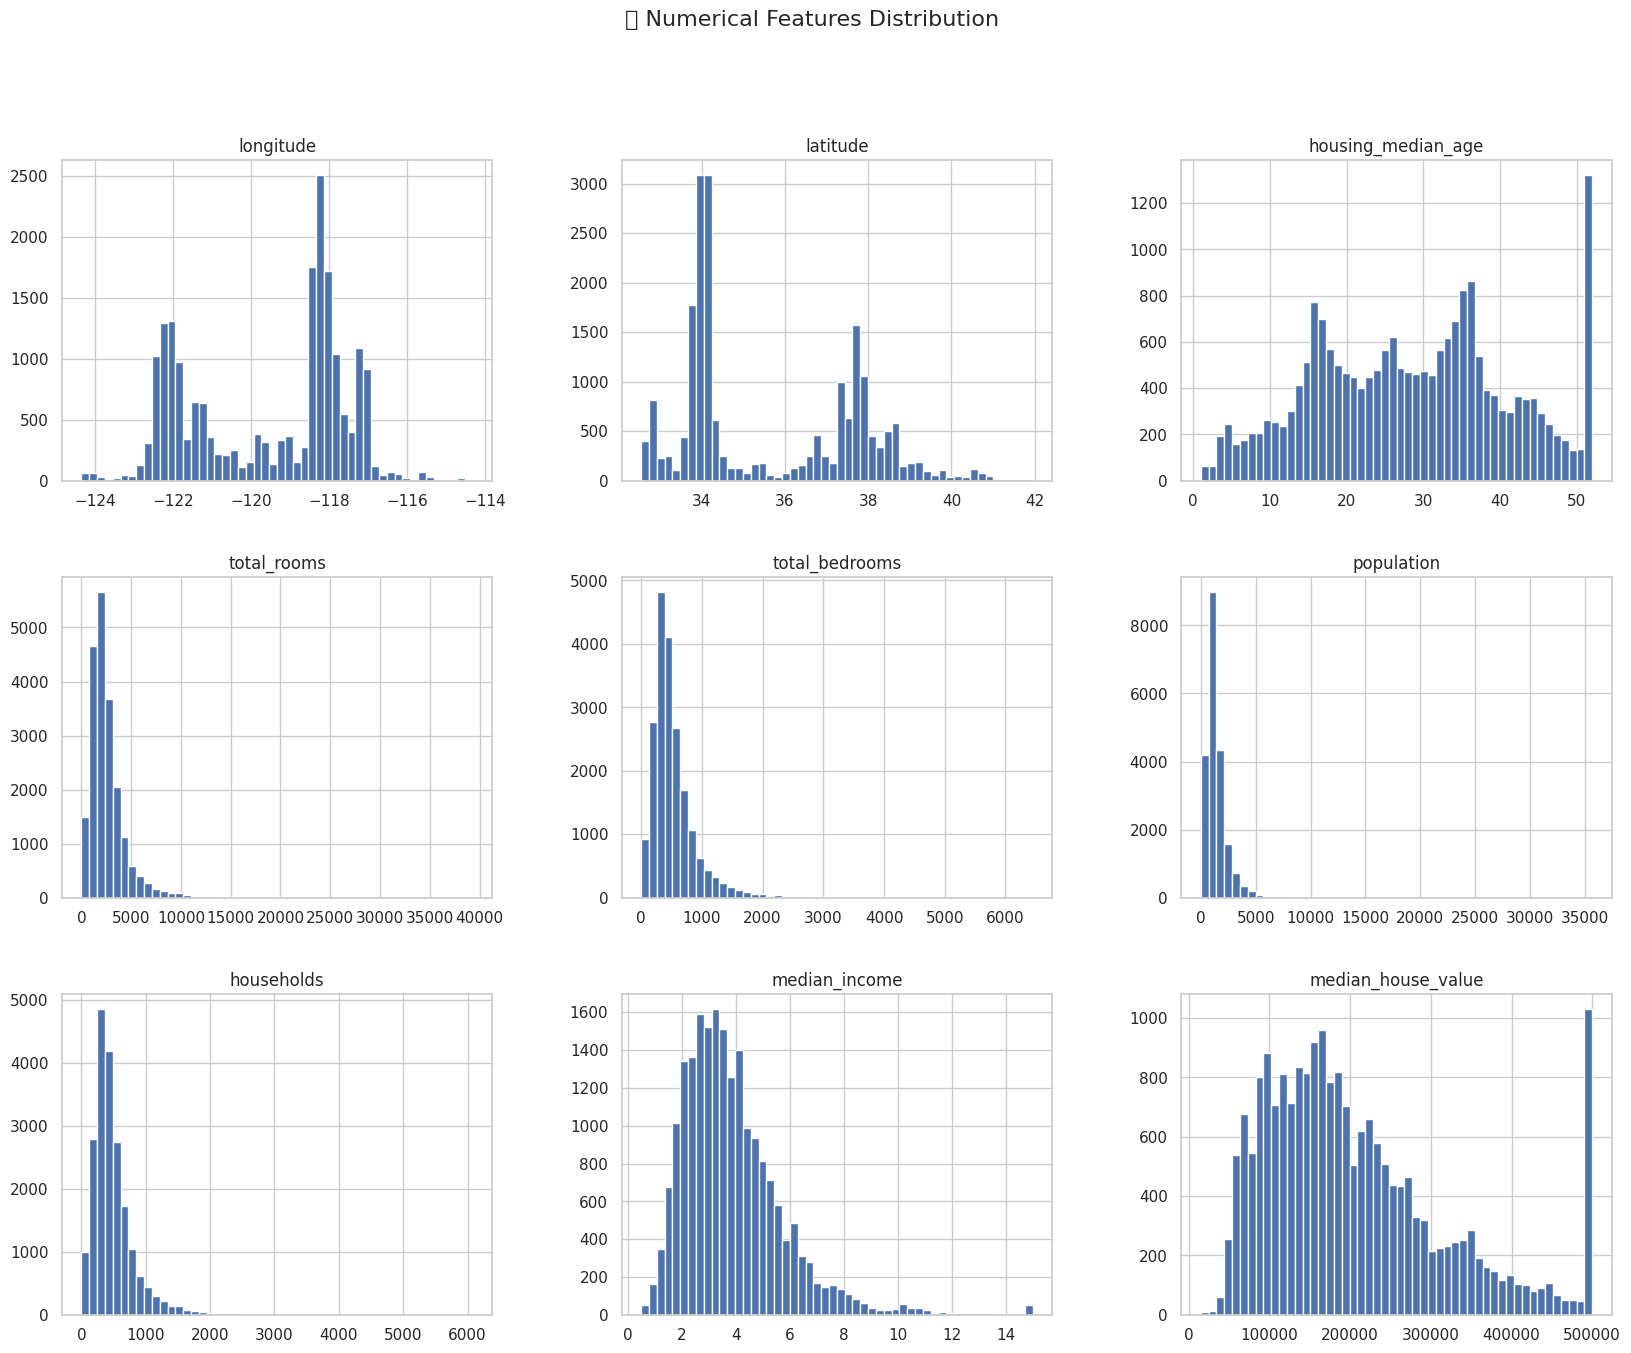


📊 Plotting feature correlation matrix:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


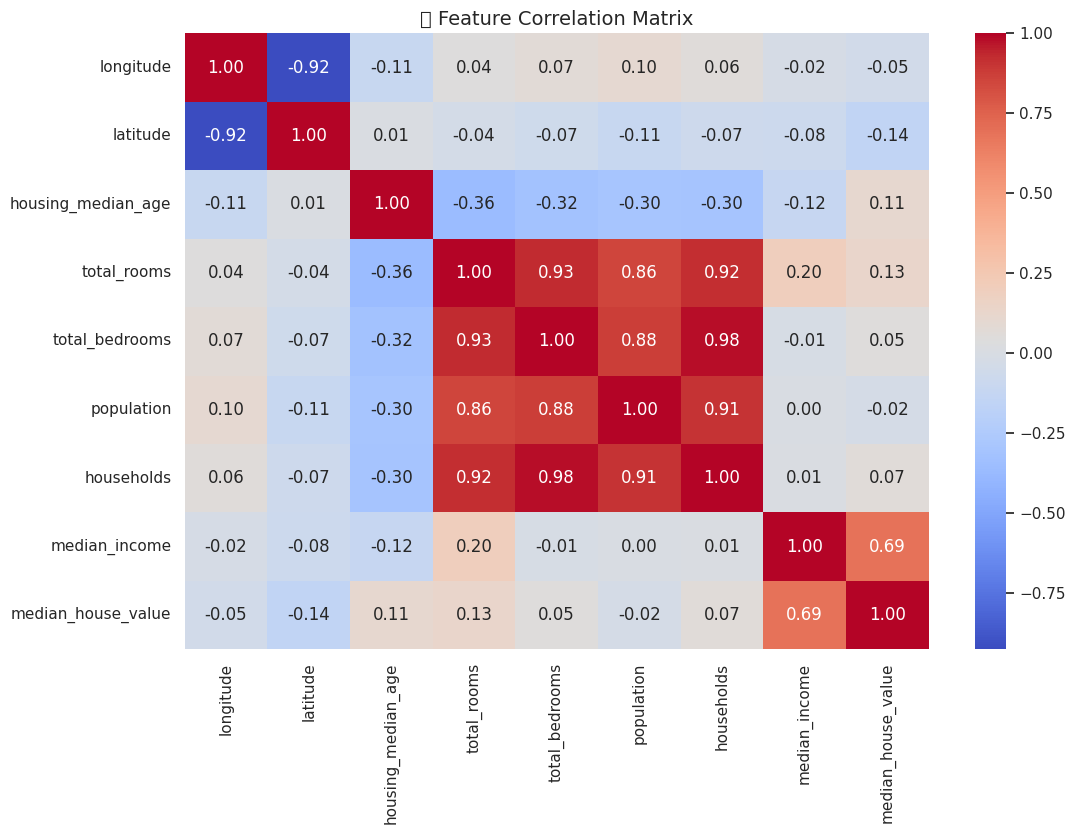


🗺️ Plotting house prices location scatter:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


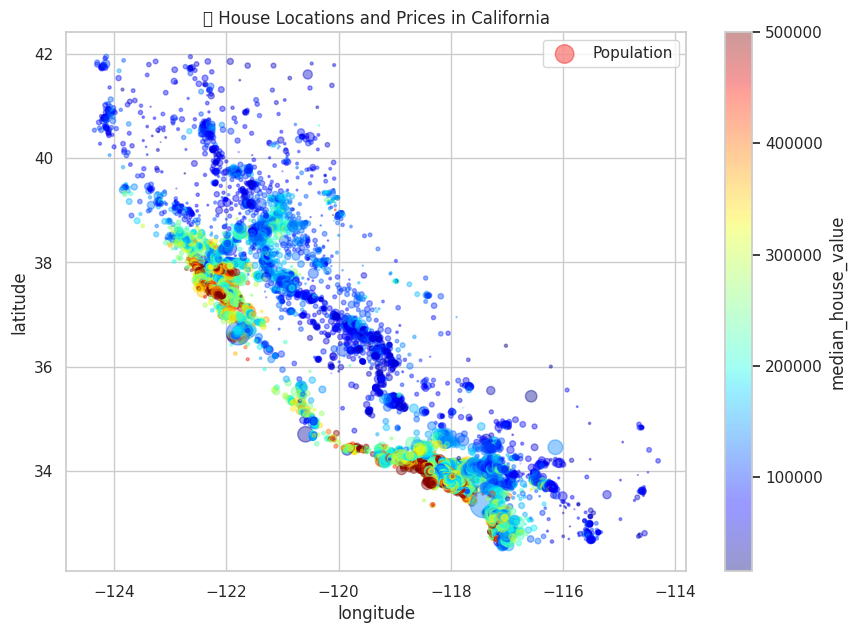

In [1]:
# 01_Data_exploration
'''
در این بخش داده‌ها از گوگل درایو بارگذاری شده و به صورت اولیه بررسی می‌شوند:

📌 کارهایی که انجام می‌شود:
- نمایش چند سطر اول داده‌ها
- بررسی نوع داده‌ها و وجود مقادیر گمشده
- آمار توصیفی داده‌ها
- ترسیم توزیع ویژگی‌های عددی
- نمایش همبستگی بین ویژگی‌ها با نمودار حرارتی (heatmap)
- رسم پراکندگی موقعیت مکانی خانه‌ها روی نقشه کالیفرنیا

🎯 هدف: درک ساختار داده‌ها، کشف الگوها و آماده‌سازی برای پیش‌پردازش و مدل‌سازی
'''

# اتصال به گوگل درایو برای بارگذاری فایل داده
from google.colab import drive
drive.mount('/content/drive')

# 📦 وارد کردن کتابخانه‌های مورد نیاز
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# مسیر فایل CSV — لطفاً مسیر خودتان را قرار دهید
file_path = "/content/drive/MyDrive/datasets/housing.csv"

# 📥 بارگذاری داده‌ها
df = pd.read_csv(file_path)

# 🧪 نمایش 5 سطر اول برای بررسی ساختار داده‌ها
print("🔹 Showing first 5 rows:")
print(df.head())

# 🧾 اطلاعات کلی از نوع داده، مقادیر خالی و ...
print("\n🔹 Dataframe info:")
print(df.info())

# 📊 آمار توصیفی ویژگی‌های عددی
print("\n🔹 Descriptive statistics:")
print(df.describe())

# 🧼 بررسی مقادیر گمشده
print("\n🔹 Missing values count per column:")
print(df.isnull().sum())

# =======================================
# 📈 مصورسازی — بخش EDA گرافیکی
# =======================================

# 🎨 تنظیمات گرافیکی
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# ✅ 1. هیستوگرام تمام ویژگی‌های عددی
print("\n📊 Plotting numerical features distribution:")
df.hist(bins=50, figsize=(20,15))
plt.suptitle("📊 Numerical Features Distribution", fontsize=16)
plt.show()

# ✅ 2. ماتریس همبستگی بین ویژگی‌ها
print("\n📊 Plotting feature correlation matrix:")
corr_matrix = df.corr(numeric_only=True)  # فقط ستون‌های عددی
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Feature Correlation Matrix", fontsize=14)
plt.show()

# ✅ 3. scatter plot موقعیت جغرافیایی با قیمت
print("\n🗺️ Plotting house prices location scatter:")
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="Population",
        c="median_house_value", cmap="jet", colorbar=True, figsize=(10,7))
plt.legend()
plt.title("🗺️ House Locations and Prices in California")
plt.show()


🔍 Missing values count before processing:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

✅ Missing values count after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

📊 Dataset sizes:
X_train: (16512, 8), y_train: (16512,)
X_test: (4128, 8), y_test: (4128,)

📈 Descriptive statistics of standardized training data:
          longitude      latitude  housing_median_age   total_rooms  \
count  1.651200e+04  1.651200e+04        1.651200e+04  1.651200e+04   
mean   1.753335e-15  6.400995e-17       -9.251859e-18  3.378004e-17   
std    1.000030e+00  1.000030e+00        1.000030e+0

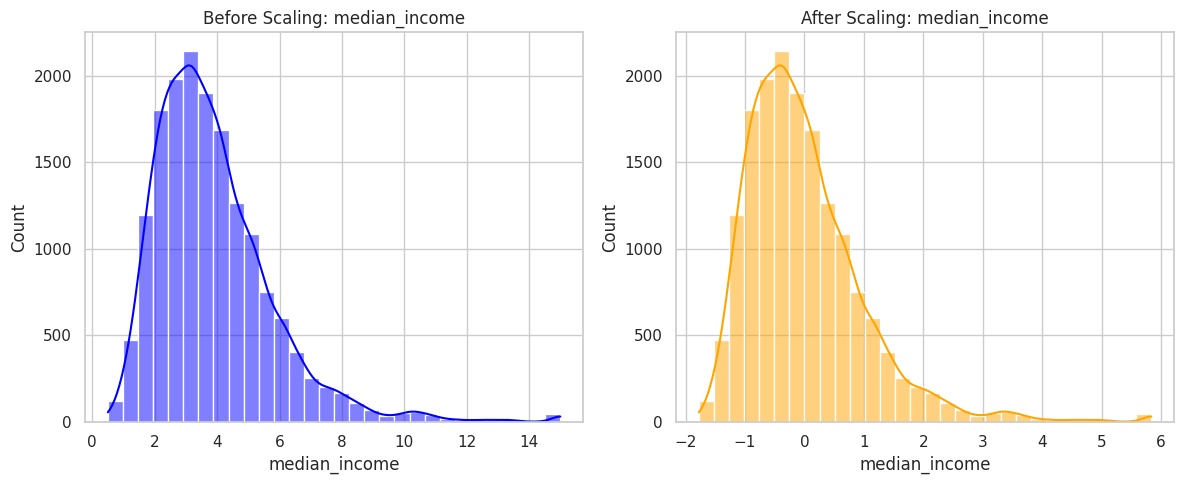

In [2]:
# 02_Data_Preprocessing
'''
در این بخش داده‌ها برای مدل‌سازی آماده می‌شوند:

📌 کارهای انجام شده:
- حذف یا جایگزینی مقادیر گمشده (در صورت وجود)
- تقسیم داده به X (ویژگی‌ها) و y (برچسب هدف)
- تقسیم داده به مجموعه آموزش و تست (برای ارزیابی مدل)
- استانداردسازی ویژگی‌ها (در صورت نیاز)
- نمایش آماری و مصورسازی روی داده‌های پردازش شده

🎯 هدف: آماده‌سازی داده‌ها برای مدل‌سازی دقیق و بدون خطا
'''

# وارد کردن کتابخانه‌های مورد نیاز
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. بررسی مقادیر گمشده (اگر داشتیم)
print("🔍 Missing values count before processing:")
print(df.isnull().sum())

# 2. جایگزینی مقادیر گمشده با میانه (Imputation) — فقط اگر مقدار گمشده وجود داشته باشه
imputer = SimpleImputer(strategy="median")  # استفاده از میانه برای جایگزینی

# فقط ستون‌های عددی را می‌گیریم چون Imputer روی داده‌های عددی کار می‌کند
housing_num = df.select_dtypes(include=[np.number])

# آموزش imputer و تبدیل داده‌ها
housing_num_imputed = imputer.fit_transform(housing_num)

# تبدیل numpy array به DataFrame برای بررسی بهتر
housing_num_imputed = pd.DataFrame(housing_num_imputed, columns=housing_num.columns)

print("\n✅ Missing values count after imputation:")
print(housing_num_imputed.isnull().sum())

# 3. تقسیم داده به ویژگی‌ها و برچسب هدف
X = housing_num_imputed.drop("median_house_value", axis=1)
y = housing_num_imputed["median_house_value"]

# 4. تقسیم داده به آموزش و تست (80% آموزش، 20% تست)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Dataset sizes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# 5. استانداردسازی ویژگی‌ها (Mean=0, Std=1) — فقط روی X_train و اعمال همزمان روی X_test
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تبدیل به DataFrame برای بررسی بهتر
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 6. نمایش آماری داده‌های استاندارد شده (train)
print("\n📈 Descriptive statistics of standardized training data:")
print(X_train_scaled_df.describe())

# 7. مصورسازی مقایسه توزیع یکی از ویژگی‌ها قبل و بعد استانداردسازی (مثال: median_income)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(X_train["median_income"], bins=30, kde=True, color='blue')
plt.title("Before Scaling: median_income")

plt.subplot(1,2,2)
sns.histplot(X_train_scaled_df["median_income"], bins=30, kde=True, color='orange')
plt.title("After Scaling: median_income")

plt.tight_layout()
plt.show()


📊 Linear Regression Model Evaluation Results:
Mean Squared Error (MSE): 5059928371.17
Mean Absolute Error (MAE): 51810.48
R-squared (R2): 0.61


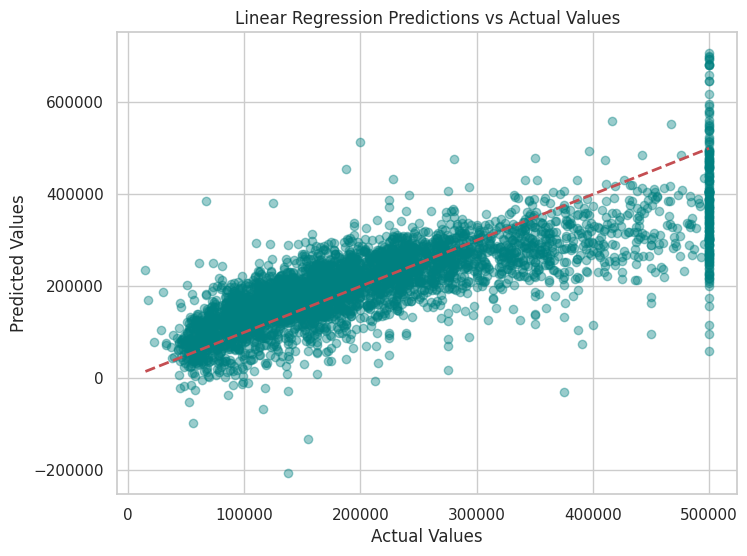

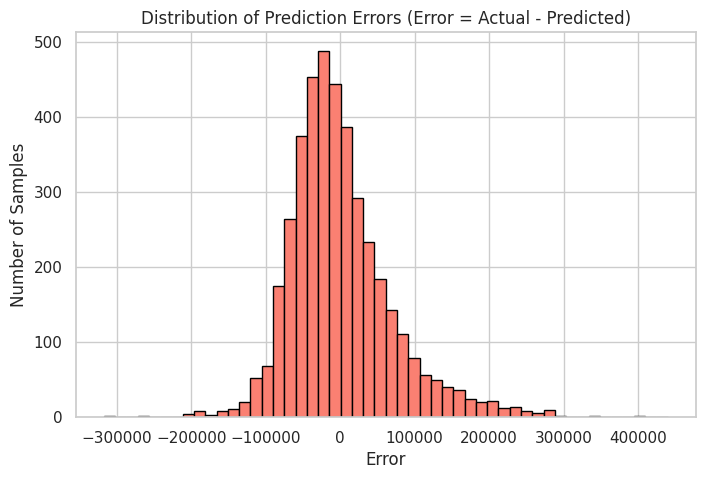

In [3]:
# 03_linear_regression
'''
در این سلول مدل رگرسیون خطی ساخته و آموزش داده می‌شود و سپس عملکرد آن روی داده‌های تست ارزیابی می‌شود:

📌 مراحل انجام شده:
1. ساخت مدل رگرسیون خطی با LinearRegression
2. آموزش مدل روی داده‌های آموزش (X_train و y_train)
3. پیش‌بینی مقدار هدف روی داده‌های تست (X_test)
4. محاسبه معیارهای ارزیابی عملکرد مدل:
   - میانگین مربع خطا (MSE)
   - میانگین قدر مطلق خطا (MAE)
   - ضریب تعیین (R2)
5. نمایش نتایج و مصورسازی پیش‌بینی در برابر مقادیر واقعی

🎯 هدف: سنجش دقت مدل خطی و درک کیفیت پیش‌بینی آن
'''

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. ساخت مدل رگرسیون خطی
model = LinearRegression()

# 2. آموزش مدل روی داده‌های آموزش
model.fit(X_train, y_train)

# 3. پیش‌بینی روی داده‌های تست
y_pred = model.predict(X_test)

# 4. محاسبه معیارهای ارزیابی مدل
mse = mean_squared_error(y_test, y_pred)      # میانگین مربع خطا
mae = mean_absolute_error(y_test, y_pred)     # میانگین قدر مطلق خطا
r2 = r2_score(y_test, y_pred)                  # ضریب تعیین

# 5. نمایش نتایج
print("📊 Linear Regression Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# 6. مصورسازی پیش‌بینی‌ها در برابر مقادیر واقعی
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # خط 45 درجه
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions vs Actual Values")
plt.grid(True)
plt.show()

# 7. نمایش توزیع خطاهای مدل (اختیاری)
errors = y_test - y_pred
plt.figure(figsize=(8,5))
plt.hist(errors, bins=50, color='salmon', edgecolor='black')
plt.title("Distribution of Prediction Errors (Error = Actual - Predicted)")
plt.xlabel("Error")
plt.ylabel("Number of Samples")
plt.show()


📌 Ridge Regression:
Mean Squared Error (MSE): 5059900216.43
R-squared (R2): 0.61

📌 Lasso Regression:
Mean Squared Error (MSE): 5059927185.75
R-squared (R2): 0.61


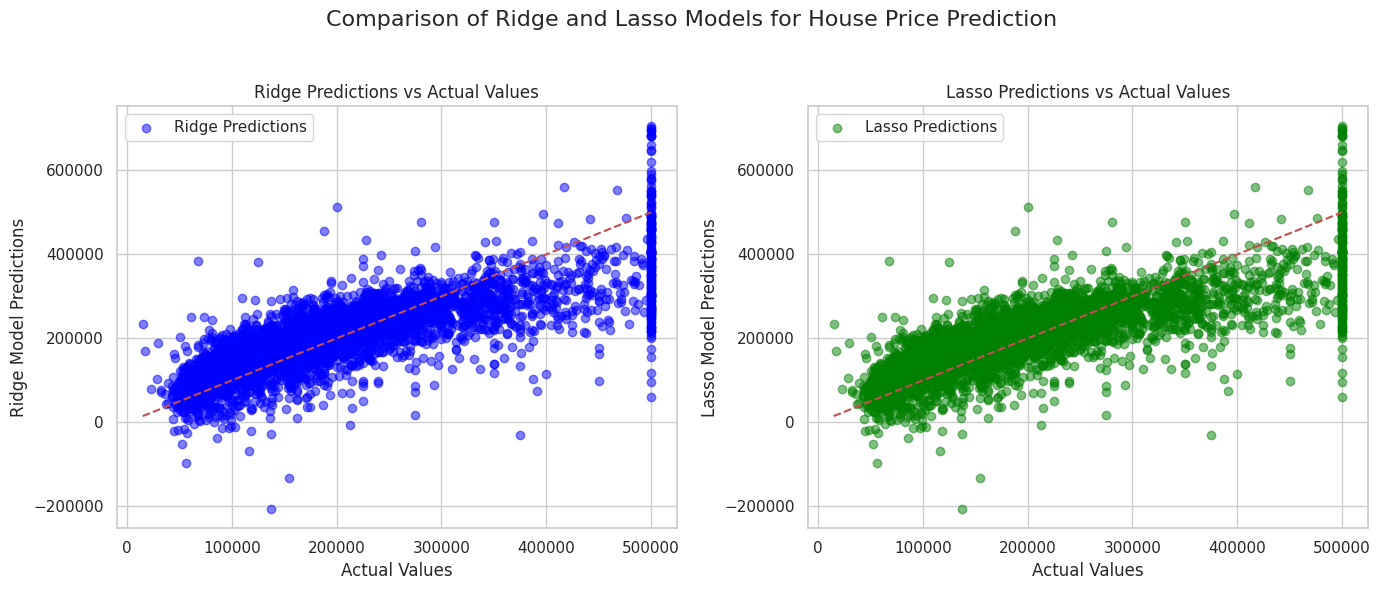

In [4]:
#04_model_improvement

'''
در این سلول مدل‌های بهبود یافته رگرسیون خطی یعنی Ridge و Lasso بررسی می‌شوند.
هدف افزودن منظم‌سازی (Regularization) برای کاهش overfitting و بهبود تعمیم‌پذیری مدل است.

📌 مراحل انجام شده:
1. ساخت مدل Ridge با alpha=1.0 و آموزش آن
2. پیش‌بینی روی داده‌های تست و ارزیابی با MSE و R2
3. ساخت مدل Lasso با alpha=0.1 و آموزش آن
4. پیش‌بینی و ارزیابی مشابه Ridge
5. مقایسه عملکرد دو مدل با نمودار

🎯 هدف: انتخاب بهترین مدل با تعادل بین دقت و پایداری
'''

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("📌 Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")

# --- Lasso Regression ---
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n📌 Lasso Regression:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")

# --- Visualization of comparison ---
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue', label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Ridge Model Predictions')
plt.title('Ridge Predictions vs Actual Values')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='green', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Lasso Model Predictions')
plt.title('Lasso Predictions vs Actual Values')
plt.legend()
plt.grid(True)

plt.suptitle('Comparison of Ridge and Lasso Models for House Price Prediction', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
